### 데이터셋 받기

In [2]:
from tensorflow.keras.datasets import cifar10

(x_train,y_train),(x_test,y_test)=cifar10.load_data()

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

170500096/170498071 [==============================] - 22s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


### CIFAR-10 데이터 그리기

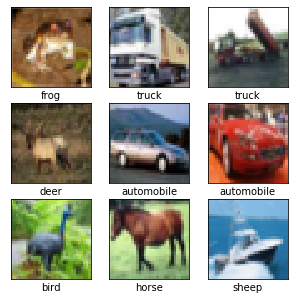

In [5]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)

class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','sheep','truck']

ls=np.random.randint(60000,size=9)

plt.figure(figsize=(5,5))

for i,idx in enumerate(ls):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i],cmap='gray')
    plt.xlabel(class_names[int(y_train[i])])
    
plt.show()

### CIFAR-10 데이터셋 전처리

In [6]:
#채널별로 평균과 표준편차를 구함.
x_mean=np.mean(x_train,axis=(0,1,2))
x_std=np.std(x_train,axis=(0,1,2))

from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.3)

print(x_train.shape,len(y_train))
print(x_val.shape,len(y_val))

(35000, 32, 32, 3) 35000
(15000, 32, 32, 3) 15000


### CIFAR-10 모델 구성하기

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten
from tensorflow.keras.optimizers import Adam

model=Sequential()

model.add(Conv2D(filters=32,kernel_size=3,padding='same',
                 activation='relu',input_shape=(32, 32, 3)))
model.add(Conv2D(filters=32,kernel_size=3,padding='same',
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='same'))

model.add(Conv2D(filters=64,kernel_size=3,padding='same',
                 activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,padding='same',
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='same'))

model.add(Conv2D(filters=128,kernel_size=3,padding='same',
                 activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,padding='same',
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='same'))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer=Adam(1e-4),
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])

### 모델 학습하기

In [10]:
history=model.fit(x_train,y_train,
                  epochs=30,
                  batch_size=32,
                 validation_data=(x_val,y_val))

Train on 35000 samples, validate on 15000 samples
Epoch 1/30
35000/35000 [==============================] - 66s 2ms/sample - loss: 1.6863 - acc: 0.4128 - val_loss: 1.3737 - val_acc: 0.5174
Epoch 2/30
35000/35000 [==============================] - 66s 2ms/sample - loss: 1.2577 - acc: 0.5547 - val_loss: 1.2058 - val_acc: 0.5734
Epoch 3/30
35000/35000 [==============================] - 65s 2ms/sample - loss: 1.0653 - acc: 0.6246 - val_loss: 1.0731 - val_acc: 0.6286
Epoch 4/30
35000/35000 [==============================] - 66s 2ms/sample - loss: 0.9036 - acc: 0.6855 - val_loss: 1.0677 - val_acc: 0.6336
Epoch 5/30
35000/35000 [==============================] - 66s 2ms/sample - loss: 0.7744 - acc: 0.7299 - val_loss: 0.9638 - val_acc: 0.6689
Epoch 6/30
35000/35000 [==============================] - 65s 2ms/sample - loss: 0.6548 - acc: 0.7720 - val_loss: 0.9484 - val_acc: 0.6901
Epoch 7/30
35000/35000 [==============================] - 66s 2ms/sample - loss: 0.5376 - acc: 0.8139 - val_loss: 1.

### CIFAR-10 학습과정 그려보기

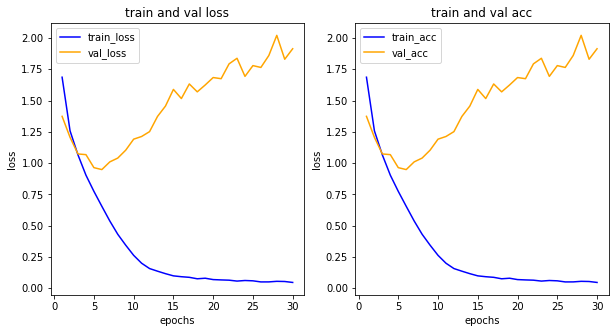

In [14]:
his_dict=history.history
loss=his_dict['loss']
val_loss=his_dict['val_loss']

epochs=range(1,len(loss)+1)
fig=plt.figure(figsize=(10,5))

ax1=fig.add_subplot(1,2,1)
ax1.plot(epochs,loss,color='blue',label='train_loss')
ax1.plot(epochs,val_loss,color='orange',label='val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc=his_dict['acc']
val_acc=his_dict['val_acc']

ax2=fig.add_subplot(1,2,2)
ax2.plot(epochs,loss,color='blue',label='train_acc')
ax2.plot(epochs,val_loss,color='orange',label='val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss')
ax2.legend()

plt.show()